# Assignement 2

### <span style="color:chocolate"> Submission requirements </span>

Your homework will not be graded if your notebook doesn't include output. In other words, <span style="color:red"> make sure to rerun your notebook before submitting to Gradescope </span> (Note: if you are using Google Colab: go to Edit > Notebook Settings  and uncheck Omit code cell output when saving this notebook, otherwise the output is not printed).

Additional points may be deducted if these requirements are not met:

    
* Comment your code;
* Each graph should have a title, labels for each axis, and (if needed) a legend. Each graph should be understandable on its own;
* Try and minimize the use of the global namespace (meaning, keep things inside functions).
---

### Import libraries

In [18]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

### Define functions

In [19]:
def create_1d_data(num_examples, w, b, bound):
  """Create X, Y data with a linear relationship with added noise.

  Args:
    num_examples: number of examples to generate
    w: desired slope
    b: desired intercept
    bound: lower and upper boundary of the data interval

  Returns:
    X and Y with shape (num_examples)
  """
  np.random.seed(4)  # consistent random number generation
  X = np.arange(num_examples)
  deltas = np.random.uniform(low=-bound, high=bound, size=X.shape) # added noise
  Y = b + deltas + w * X

  return X, Y

---
### Step 1: Data ingestion

Let's start by creating some artificial data using the <span style="color:chocolate">create_1d_data()</span> function defined at the top of the notebook.

In [20]:
# Define parameters
num_examples = 70
w = 2
b = 1
bound = 1

# Create data
X, Y = create_1d_data(num_examples, w, b, bound)

# Print shapes
print('Printing shape of X:', X.shape)
print('Printing first 10 elements in X:', X[:10])
print('\nPrinting shape of Y:', Y.shape)
print('Printing first 10 elements in Y:', Y[:10])

Printing shape of X: (70,)
Printing first 10 elements in X: [0 1 2 3 4 5 6 7 8 9]

Printing shape of Y: (70,)
Printing first 10 elements in Y: [ 1.93405968  3.0944645   5.94536872  7.42963199  9.39545765 10.43217899
 13.95254891 14.01246051 16.50596472 18.86958306]


---
### Step 2: Data Preprocessing

Our objectives here involve adding one more feature to X and creating data partitions.

### <span style="color:chocolate">Exercise 1:</span> Adding features (10 points)

1. Add a column of $1s$ to $X$ (this will serve as an intercept or "bias" in our modeling task later on). Note: do not create a new array, just concatenate with the current values;
2. Print the shape of the array.

In [21]:
# YOUR CODE HERE
# 1. Add a column of 1's to X
X_with_intercept = np.column_stack((np.ones(X.shape[0]), X))

# 2. Print the shape of the new array
print("Shape of X with intercept:", X_with_intercept.shape)

Shape of X with intercept: (70, 2)


### <span style="color:chocolate">Exercise 2:</span> Data splits (10 points)

Using the <span style="color:chocolate">train_test_split()</span> method available in scikit-learn:
1. Split the (X,Y) data into training and test paritions by setting test_size=0.2 and random_state=1234. All the other arguments of the method are set to default values. Name the resulting arrays X_train, X_test, Y_train, Y_test;
2. Print the shape of each array.

In [22]:
# YOUR CODE HERE
# Split the data into training and testing partitions
X_train, X_test, Y_train, Y_test = train_test_split(X_with_intercept, Y, test_size=0.2, random_state=1234)

# Print the shapes of each array
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)


Shape of X_train: (56, 2)
Shape of X_test: (14, 2)
Shape of Y_train: (56,)
Shape of Y_test: (14,)


---
### Step 3: Exploratory data analysis (EDA)

### <span style="color:chocolate">Exercise 3:</span> Plots (10 points)

Create a side-by-side histogram for the values in Y_train and X_train. Make sure to include axes name and titles for each subplot.

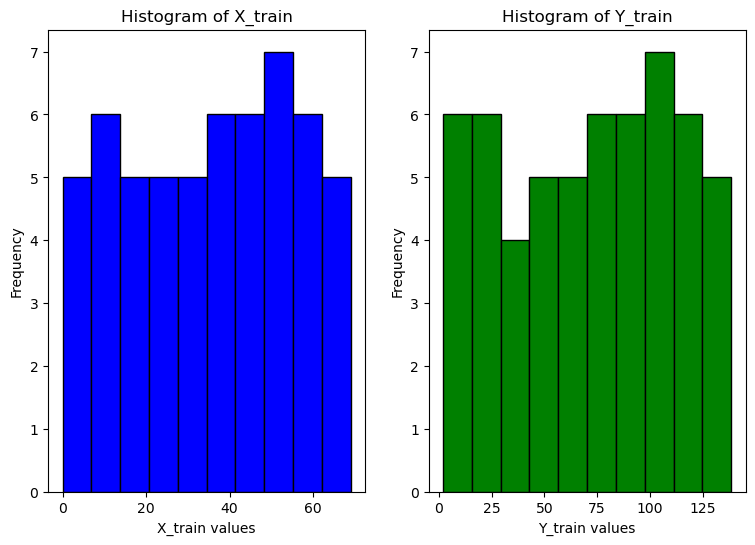

In [23]:
# YOUR CODE HERE
# Create histograms for X_train and Y_train
fig, axes = plt.subplots(1, 2, figsize=(9, 6))  # Create 1 row, 2 columns

# Plot histogram for X_train
axes[0].hist(X_train[:, 1], bins=10, color='blue', edgecolor='black')  # Only take the X values (exclude bias)
axes[0].set_title('Histogram of X_train')
axes[0].set_xlabel('X_train values')
axes[0].set_ylabel('Frequency')

# Plot histogram for Y_train
axes[1].hist(Y_train, bins=10, color='green', edgecolor='black')
axes[1].set_title('Histogram of Y_train')
axes[1].set_xlabel('Y_train values')
axes[1].set_ylabel('Frequency')

# Display the plot
plt.show()


---
### Step 4: Modeling

Let's start by considering the two models proposed in Assignment 1:
1. $M_1(x) = 5+x$ 
2. $M_2(x) = 1+2x$

### <span style="color:chocolate">Exercise 4:</span> Practice with Parameters (10 points)

Perform the following computations:

1. Use matrix multiplication (np.dot) to create $M_1$ and $M_2$ (as previously defined) to produce vectors of predictions using the X_train data. Call these predictions M1_hat_train, M2_hat_train. Hint: the "learned" parameters are alredy provided to you;
3. Print the shapes of the predictions to verify that they match the shape of Y_train.

In [24]:
# YOUR CODE HERE
# parameters for the model M1
w1, b1 = 1, 5
# parameters for the model M2
w2, b2 = 2, 1

# Define the parameters for the models as 2D column vectors
params_M1 = np.array([b1, w1]).reshape(-1, 1)  # [b1, w1]
params_M2 = np.array([b2, w2]).reshape(-1, 1)  # [b2, w2]

# Perform matrix multiplication to calculate the predictions for each model
# Each X_train example is now in the form [1, x]
M1_hat_train = np.dot(X_train, params_M1) 
M2_hat_train = np.dot(X_train, params_M2)

# Convert predictions to 1D arrays by squeezing (removing the extra dimension)
M1_hat_train = M1_hat_train.squeeze()
M2_hat_train = M2_hat_train.squeeze()

# Print the shapes of the predictions
print("Shape of Y_Train:", Y_train.shape)
print("Shape of M1_hat_train:", M1_hat_train.shape)
print("Shape of M2_hat_train:", M2_hat_train.shape)

# print the first few predictions to inspect

print("First 5 predictions for Y_train:", Y_train[:5])
print("First 5 predictions for M1_hat_train:", M1_hat_train[:5])
print("First 5 predictions for M2_hat_train:", M2_hat_train[:5])

Shape of Y_Train: (56,)
Shape of M1_hat_train: (56,)
Shape of M2_hat_train: (56,)
First 5 predictions for Y_train: [101.79100233 131.72202862  43.89795461 105.27511415  91.00506612]
First 5 predictions for M1_hat_train: [55. 70. 26. 57. 50.]
First 5 predictions for M2_hat_train: [101. 131.  43. 105.  91.]


### <span style="color:chocolate">Exercise 5:</span> Learn parameters with Gradient Descent (20 points)

1. Fill in the <span style="color:green">NotImplemented</span> parts of the <span style="color:chocolate">gradient_descent()</span> function below. Hint: refer to ``02 Linear Regression_helper.ipynb file``;

2. Run this function with our artificial (X_train, Y_train) data . Set learning_rate = .0002 and num_epochs = 5. Print out the weights and loss after each epoch. 

3. Generate a plot with the loss values on the y-axis and the epoch number on the x-axis for visualization. Make sure to include axes name and title.

In [25]:
def gradient_descent(inputs, outputs, learning_rate, num_epochs):
  """Apply the gradient descent algorithm to learn learn linear regression.

  Args:
    inputs: A 2-D array where each column is an input feature and each
            row is a training example.
    outputs: A 1-D array containing the real-valued
             label corresponding to the input data in the same row.
    learning_rate: The learning rate to use for updates.
    num_epochs: The number of passes through the full training data.

  Returns:
    weights: A 2-D array with the learned weights after each training epoch.
    losses: A 1-D array with the loss after each epoch.
  """
  # m = number of examples, n = number of features
  m, n = inputs.shape
  
  # We'll use a vector of size n to store the learned weights and initialize
  # all weights to 1. 
  W = np.ones(n)
  
  # Keep track of the training loss and weights after each step.
  losses = []
  weights = []
  
  for epoch in range(num_epochs):
    # Append the old weights to the weights list to keep track of them.
    weights.append(W)

    # Evaluate the current predictions for the training examples given
    # the current estimate of W. 
    predictions = np.dot(inputs, W)  # Linear regression: h_W(x) = X * W
    
    # Find the difference between the predictions and the actual target
    # values.
    diff = predictions - outputs  # Residual error (predictions - actual values)
    
    # In standard linear regression, we want to minimize the sum of squared
    # differences. Compute the mean squared error loss. Don't bother with the
    # 1/2 scaling factor here.
    loss = (1/m) * np.sum(diff**2)  # MSE loss without the 1/2 factor

    # Append the loss to the losses list to keep a track of it.
    losses.append(loss)
    
    # Compute the gradient with respect to the loss.
    # [Formula (4) in the Gradient Descent Implementation]
    gradient = (1 / m) * np.dot(inputs.T, diff) # X^T * (predictions - Y)

    # Update weights, scaling the gradient by the learning rate.
    W = W - learning_rate * gradient
      
  return np.array(weights), np.array(losses)

Epoch 1 - Weights: [1. 1.], Loss: 1665.3666608648084
Epoch 2 - Weights: [1.00709394 1.33262886], Loss: 742.4148662596614
Epoch 3 - Weights: [1.01183193 1.55469157], Loss: 331.0657262384294
Epoch 4 - Weights: [1.01499708 1.7029404 ], Loss: 147.73208292579974
Epoch 5 - Weights: [1.01711221 1.80191116], Loss: 66.0223586320446


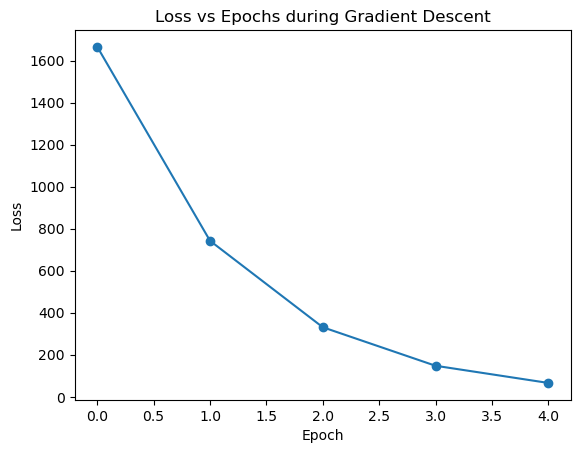

In [26]:
# YOUR CODE HERE
# Set learning rate and number of epochs
learning_rate = 0.0002
num_epochs = 5

# Run gradient descent
weights, losses = gradient_descent(X_train, Y_train, learning_rate, num_epochs)

# Print the learned weights and loss after each epoch
for epoch in range(num_epochs):
    print(f"Epoch {epoch+1} - Weights: {weights[epoch]}, Loss: {losses[epoch]}")

# Plot the loss vs. epochs
plt.plot(range(num_epochs), losses, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epochs during Gradient Descent')
plt.show()

---
### Step 5: Hyperparameter tuning

Hyperparameter tuning plays an important role in optimizing ML models. One systematically adjusts hyperparameters to find the right balance between model complexity and generalization, ultimately leading to better predictive performance and model effectiveness.

Note that hyperparameter tuning is typically performed on **a separate validation dataset**. However, for the purposes of this assignment and based on the ML knowledge you've acquired thus far, we will perform hyperparameter tuning directly on the training data.

### <span style="color:chocolate">Exercise 6:</span> Tuning hyperparameters (10 points)

Answer the following questions:
    
1. Do you think it would be beneficial to extend the model training in Exercise 5 by increasing the learning rate to 0.02? Justify your answer;

2. Restoring to the previous learning_rate = .0002, would you  consider extending the model training in Exercise 5 by increasing the number of epochs to 10? Justify your answer.

Note: to support your answers, we recommend the following actions:
- create side-by-side subplots to show the loss at each epoch (make sure to include axes name and title), and
- print the loss at the last epoch under the following scenarios:
    - learning_rate=.0002, num_epochs=5;
    - learning_rate=.02, num_epochs=5;
    - learning_rate=.0002, num_epochs=10.

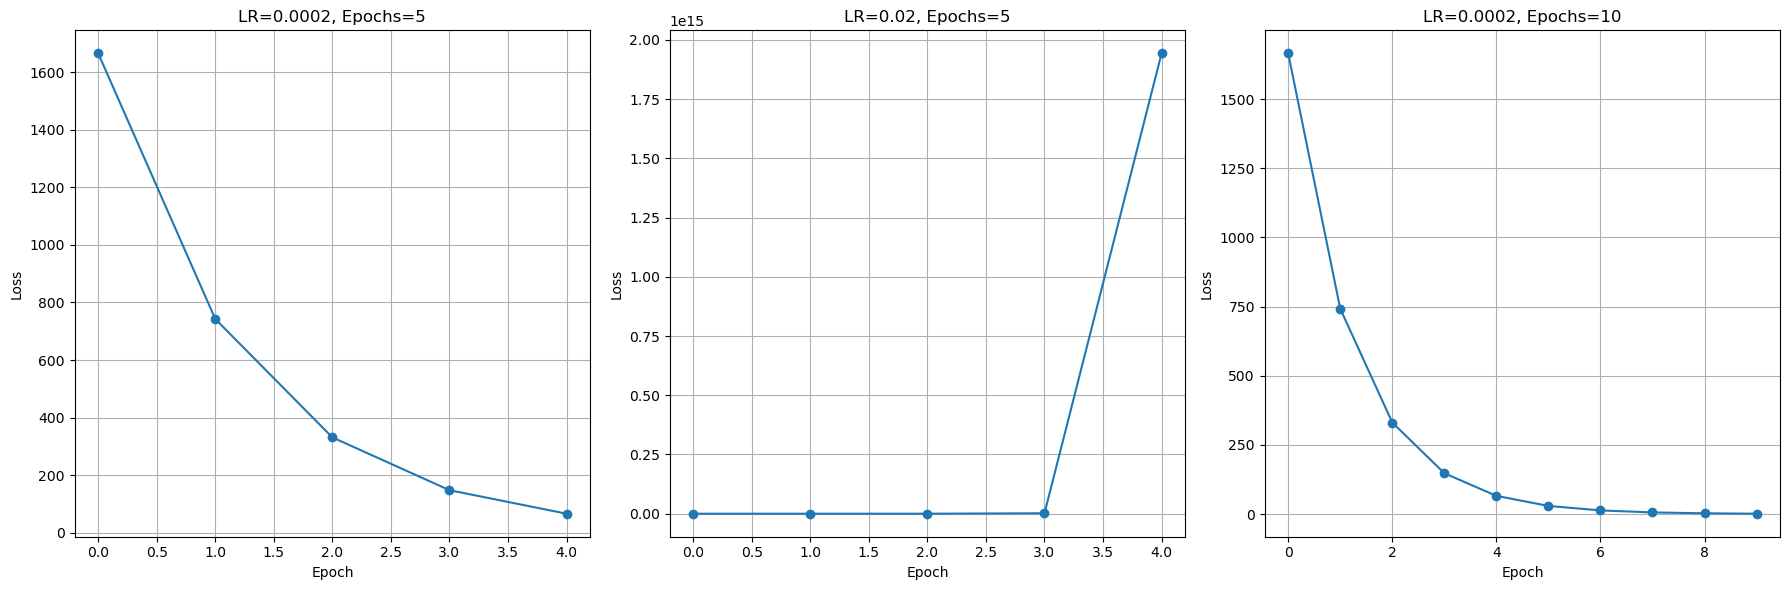

Loss at the last epoch (LR=0.0002, Epochs=5): 66.0223586320446 : weights=[1.01711221 1.80191116]
Loss at the last epoch (LR=0.02, Epochs=5): 1943544404976516.2 : weights=[  -23036.06070114 -1081139.68066399]
Loss at the last epoch (LR=0.0002, Epochs=10): 1.479786682981072 : weights=[1.02081727 1.97432553]


In [27]:
# YOUR CODE HERE
# Set up the scenarios to test:
scenarios = [
    {'learning_rate': 0.0002, 'num_epochs': 5},
    {'learning_rate': 0.02, 'num_epochs': 5},
    {'learning_rate': 0.0002, 'num_epochs': 10}
]

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Run gradient descent for each scenario and plot the loss for each
for idx, scenario in enumerate(scenarios):
    learning_rate = scenario['learning_rate']
    num_epochs = scenario['num_epochs']
    
    # Run gradient descent
    _, losses = gradient_descent(X_train, Y_train, learning_rate, num_epochs)
    
    # Plot the loss over epochs
    axes[idx].plot(range(num_epochs), losses, marker='o')
    axes[idx].set_xlabel('Epoch')
    axes[idx].set_ylabel('Loss')
    axes[idx].set_title(f"LR={learning_rate}, Epochs={num_epochs}")
    axes[idx].grid(True)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# Print the loss at the last epoch for each scenario
for scenario in scenarios:
    learning_rate = scenario['learning_rate']
    num_epochs = scenario['num_epochs']
    
    # Run gradient descent
    weights , losses = gradient_descent(X_train, Y_train, learning_rate, num_epochs)
    
    # Print the loss at the last epoch
    print(f"Loss at the last epoch (LR={learning_rate}, Epochs={num_epochs}): {losses[-1]} : weights={weights[-1]}")

### <span style="color:chocolate">Exercise 7:</span> Choosing the best model (10 points)

Write down the learned model that you consider most optimal given your answers to the hyperparameter tuning exercise. Call this model $M_3(x)$.

# YOUR ANSWER HERE
from gradient descent (after running for 10 epochs with a learning rate of 0.0002) are:
𝑤0=1.02081727
𝑤1=1.97432553

The learned model 
𝑀3(𝑥)=1.02081727+1.97432553.x

​Best learning rate: 0.0002
Best number of epochs: 10
This was chosen because it gave a good trade-off between convergence and stability without causing too much overshooting with minimal loss value of 1.479

---
### Step 6: Evaluation and Generalization

To evaluate our models, we assess their performance based on how closely they fit the available data. In other words, we compare the true value $y$ with the predicted value $\hat{y}$ for each $x$.

### <span style="color:chocolate">Exercise 8:</span> Computing MSE (10 points)

Assess the performance of the three models ($M_1(x)$, $M_2(x)$, $M_3(x)$) by computing the MSE metric on the training dataset. Hint: you can use the <span style="color:chocolate">mean_squared_error()</span> method available in sklearn.metrics.

In [28]:
# YOUR CODE HERE
from sklearn.metrics import mean_squared_error
import numpy as np

# Given training data X_train and Y_train from earlier
# Assuming X_train already has the bias term (intercept) as first column

# Define the three models:
# M_1(x) = 5 + x
def M1(x):
    return 5 + x

# M_2(x) = 1 + 2x
def M2(x):
    return 1 + 2 * x

# M_3(x) = 5 + 2x (learned model)
def M3(x):
    return 1.02081727 + 1.97432553 * x

# Compute the predictions of each model on X_train
M1_hat_train = M1(X_train[:, 1])  # Take x1 values
M2_hat_train = M2(X_train[:, 1])  # Take x1 values
M3_hat_train = M3(X_train[:, 1])  # Take x1 values

# Compute the MSE for each model
mse_M1 = mean_squared_error(Y_train, M1_hat_train)
mse_M2 = mean_squared_error(Y_train, M2_hat_train)
mse_M3 = mean_squared_error(Y_train, M3_hat_train)

# Print the MSE for each model
print(f'MSE of M1(x) = 5 + x: {mse_M1}')
print(f'MSE of M2(x) = 1 + 2x: {mse_M2}')
print(f'MSE of M3(x) = 1.02081727 + 1.97432553.x (learned model): {mse_M3}')


MSE of M1(x) = 5 + x: 1397.608983658733
MSE of M2(x) = 1 + 2x: 0.3280557752885262
MSE of M3(x) = 1.02081727 + 1.97432553.x (learned model): 1.4797869673992419


### <span style="color:chocolate">Exercise 9:</span> Generalization (10 points)

Which of the three models ($M_1(x)$, $M_2(x)$, $M_3(x)$) demonstrates better generalization ability?

In [29]:
# YOUR CODE HERE
# Assuming we already have X_test, Y_test from earlier
# Assuming the models M1, M2, M3 are defined as before

# Make predictions for the test set using each model
M1_hat_test = M1(X_test[:, 1])  # M1 predictions on X_test
M2_hat_test = M2(X_test[:, 1])  # M2 predictions on X_test
M3_hat_test = M3(X_test[:, 1])  # M3 predictions on X_test

# Compute the MSE for each model on the test set
mse_M1_test = mean_squared_error(Y_test, M1_hat_test)
mse_M2_test = mean_squared_error(Y_test, M2_hat_test)
mse_M3_test = mean_squared_error(Y_test, M3_hat_test)

# Print the MSE for each model on the test set
print(f'MSE of M1(x) = 5 + x (on test set): {mse_M1_test}')
print(f'MSE of M2(x) = 1 + 2x (on test set): {mse_M2_test}')
print(f'MSE of M3(x) = 1.02081727 + 1.97432553.x (learned model) (on test set): {mse_M3_test}')

# You can also compare the training MSEs to get an overall sense of generalization:
print(f'\nTraining MSE of M1(x): {mse_M1}')
print(f'Training MSE of M2(x): {mse_M2}')
print(f'Training MSE of M3(x): {mse_M3}')


MSE of M1(x) = 5 + x (on test set): 1113.6003911560044
MSE of M2(x) = 1 + 2x (on test set): 0.2908006971666422
MSE of M3(x) = 1.02081727 + 1.97432553.x (learned model) (on test set): 1.0660536981832818

Training MSE of M1(x): 1397.608983658733
Training MSE of M2(x): 0.3280557752885262
Training MSE of M3(x): 1.4797869673992419


Best Generalization: Model 
𝑀2(𝑥)=1+2𝑥 shows the best generalization ability, as it has a very small gap between the training and test MSE, and its test MSE is the lowest among the three models.

----
#### <span style="color:chocolate">Additional practice question</span> (not graded)

1. How does stochastic gradient descent (SGD) differ from the gradient descent (GD) approach implemented in Exercise 5?
2. Determine the optimal weights for model $M_3(x)$ using SGD. Does SGD converge more rapidly? Explain the reasons for your answer.

In [30]:
# YOUR ANSWER HERE

In [31]:
# YOUR CODE HERE